In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Dowloading data files

!curl -O 'https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip'
!mkdir 'data/'
!unzip 'Bike-Sharing-Dataset.zip' -d 'data/bike_sharing'

In [2]:
df = pd.read_csv('data/bike_sharing/hour.csv')
df.columns.values

array(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday',
       'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum',
       'windspeed', 'casual', 'registered', 'cnt'], dtype=object)

In [3]:
df['hr_sin'] = np.sin(df.hr*(2.*np.pi/24))
df['hr_cos'] = np.cos(df.hr*(2.*np.pi/24))
df['mnth_sin'] = np.sin((df.mnth-1)*(2.*np.pi/12))
df['mnth_cos'] = np.cos((df.mnth-1)*(2.*np.pi/12))

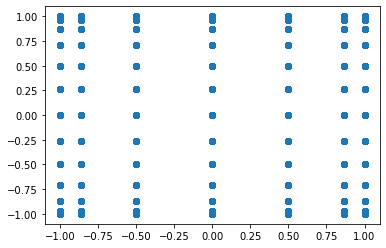

In [4]:
plt.scatter(df['mnth_sin'],df['hr_sin'])

### Construct the pipeline with a standard scaler and a small neural network

In [5]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('nn', MLPRegressor(hidden_layer_sizes=(5,), max_iter=1000)))
model = Pipeline(estimators)

In [6]:

# To begin, let's use only these two features to predict 'cnt' (bicycle count)
features = ['mnth','hr']
X = df[features].values
y = df.cnt

In [7]:

# We'll use 5-fold cross validation. That is, a random 80% of the data will be used
# to train the model, and the prediction score will be computed on the remaining 20%.
# This process is repeated five times such that the training sets in each "fold"
# are mutually orthogonal.
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=5)

In [8]:
features = ['mnth_sin','mnth_cos','hr_sin','hr_cos']
X = df[features].values

results = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
print('CV Scoring Result: mean=',np.mean(results),'std=',np.std(results))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


CV Scoring Result: mean= -22571.211836364397 std= 7238.8020589875005


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
